# HW3: PCA

## start up R within IPython

In [30]:
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


##Tutorial on PCA  -- adapted from [ISL] Ch.10


R Help on 'USArrests'USArrests               package:datasets               R Documentation

_V_i_o_l_e_n_t _C_r_i_m_e _R_a_t_e_s _b_y _U_S _S_t_a_t_e

_D_e_s_c_r_i_p_t_i_o_n:

     This data set contains statistics, in arrests per 100,000
     residents for assault, murder, and rape in each of the 50 US
     states in 1973.  Also given is the percent of the population
     living in urban areas.

_U_s_a_g_e:

     USArrests
     
_F_o_r_m_a_t:

     A data frame with 50 observations on 4 variables.

       [,1]  Murder    numeric  Murder arrests (per 100,000)  
       [,2]  Assault   numeric  Assault arrests (per 100,000) 
       [,3]  UrbanPop  numeric  Percent urban population      
       [,4]  Rape      numeric  Rape arrests (per 100,000)    
      
_S_o_u_r_c_e:

     World Almanac and Book of facts 1975.  (Crime rates).

     Statistical Abstracts of the United States 1975.  (Urban rates).

_R_e_f_e_r_e_n_c_e_s:

  

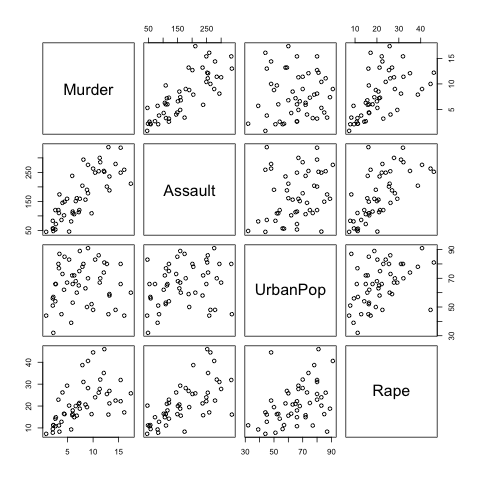

In [31]:
%%R

not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])

if (not.installed("ISLR"))  install.packages("ISLR")

library(ISLR)  #  load the ISLR package

print(help(USArrests))  #  information about the USArrests dataset
    
# This dataset is studied in Chapter 10 of the [ISL] text.
#  Section 10.2 is about PCA.

pairs(USArrests)

##Lab 1 from Chapter 10: Principal Components Analysis

In [32]:
%%R

states = row.names(USArrests)
print(states)

print( names(USArrests) )


 [1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"       
[1] "Murder"   "Assault"  "UrbanPop" "Rape"    


In [33]:
%%R

print( apply(USArrests,  2,  mean) )
print( apply(USArrests,  2,  var) )

  Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232 
    Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916 


[1] "sdev"     "rotation" "center"   "scale"    "x"       
  Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232 
   Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385 
                PC1        PC2        PC3         PC4
Murder   -0.5358995  0.4181809 -0.3412327  0.64922780
Assault  -0.5831836  0.1879856 -0.2681484 -0.74340748
UrbanPop -0.2781909 -0.8728062 -0.3780158  0.13387773
Rape     -0.5434321 -0.1673186  0.8177779  0.08902432
[1] 50  4


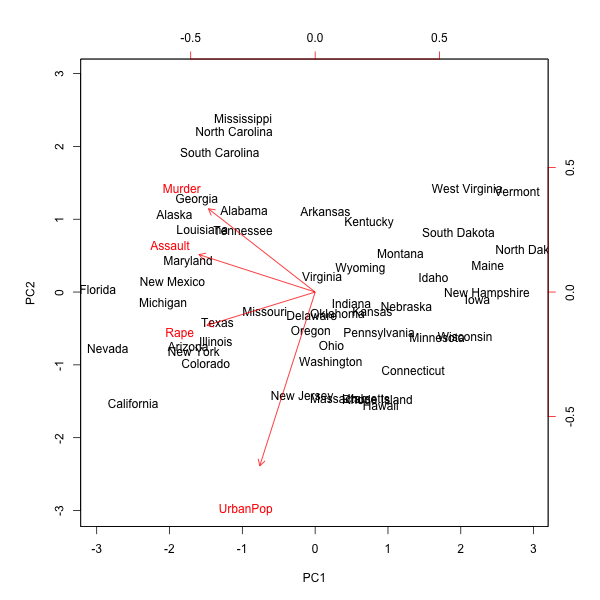

In [34]:
%%R -h 600 -w 600

pr.out = prcomp(USArrests,  scale = TRUE)

print( names(pr.out) )
print( pr.out$center )
print( pr.out$scale )
print( pr.out$rotation )
print( dim(pr.out$x) )

biplot(pr.out,  scale = 0)

                PC1        PC2        PC3         PC4
Murder   -0.5358995  0.4181809 -0.3412327  0.64922780
Assault  -0.5831836  0.1879856 -0.2681484 -0.74340748
UrbanPop -0.2781909 -0.8728062 -0.3780158  0.13387773
Rape     -0.5434321 -0.1673186  0.8177779  0.08902432


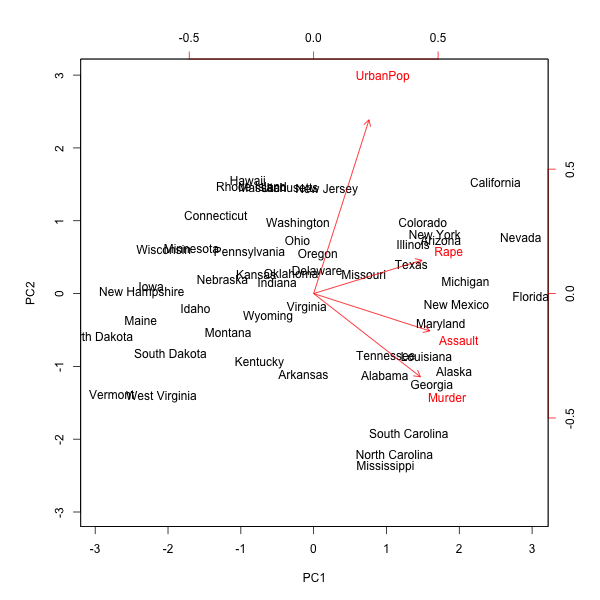

In [35]:
%%R -h 600 -w 600

print( pr.out$rotation )

# perform a mirror-image transformation of the plot
#  (signs of principal components/eigenvectors do not matter)

pr.out$rotation = -pr.out$rotation  #  negate all eigenvectors/PCs
pr.out$x = -pr.out$x  # also negate all coordinate values

biplot(pr.out,  scale = 0)  # should be the mirror image


[1] 1.5748783 0.9948694 0.5971291 0.4164494
[1] 2.4802416 0.9897652 0.3565632 0.1734301
[1] 0.62006039 0.24744129 0.08914080 0.04335752


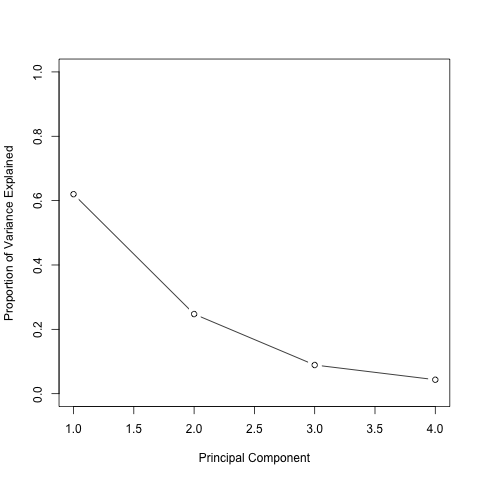

In [36]:
%%R

print( pr.out$sdev )
pr.var = pr.out$sdev^2
print( pr.var )

pve = pr.var/sum(pr.var)
# eigenvalues divided by total = proportion of variance explained [pve]
print( pve )

plot(pve,  xlab = "Principal Component",  ylab = "Proportion of Variance Explained",  ylim = c(0, 1), type = 'b')


[1]  1  3 11  8


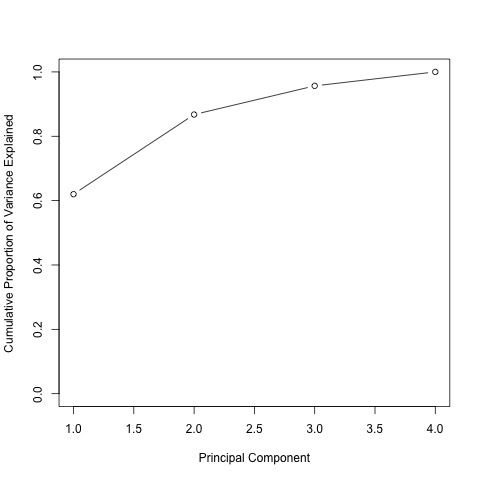

In [37]:
%%R

plot(cumsum(pve),  xlab = "Principal Component",  ylab = "Cumulative Proportion of Variance Explained",  ylim = c(0, 1), type = 'b')
a = c(1, 2, 8, -3)
cumsum(a)

               PC1        PC2        PC3         PC4
Murder   0.5358995 -0.4181809  0.3412327 -0.64922780
Assault  0.5831836 -0.1879856  0.2681484  0.74340748
UrbanPop 0.2781909  0.8728062  0.3780158 -0.13387773
Rape     0.5434321  0.1673186 -0.8177779 -0.08902432


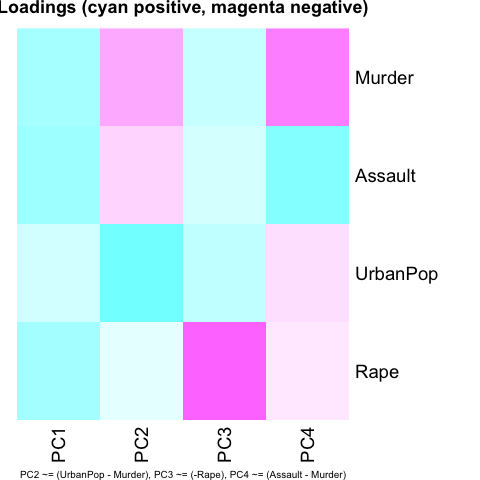

In [38]:
%%R

print( pr.out$rotation )

heatmap( pr.out$rotation,
        main="Loadings (cyan positive, magenta negative)",
        sub="PC2 ~= (UrbanPop - Murder), PC3 ~= (-Rape), PC4 ~= (Assault - Murder)",
        col=rev(cm.colors(256)),
        scale="none", rev=TRUE, symm=FALSE,
        Rowv=NA, Colv=NA, mar=c(5,10) )

##How to do PCA using only the SVD

In [39]:
%%R

print(cov(USArrests))

PCAsvd = svd( cov(USArrests) )

U = PCAsvd$u
S = diag(PCAsvd$d)
V = PCAsvd$v

cat("\n\nU:\n")
print(U)

cat("\n\nS:\n")
print(S)

cat("\n\nV:\n")
print(V)

cat("\n\nerror in SVD reconstruction:\n")
print( norm( cov(USArrests) - U %*% S %*% t(V) ) )


             Murder   Assault   UrbanPop      Rape
Murder    18.970465  291.0624   4.386204  22.99141
Assault  291.062367 6945.1657 312.275102 519.26906
UrbanPop   4.386204  312.2751 209.518776  55.76808
Rape      22.991412  519.2691  55.768082  87.72916


U:
            [,1]        [,2]        [,3]        [,4]
[1,] -0.04170432  0.04482166 -0.07989066 -0.99492173
[2,] -0.99522128  0.05876003  0.06756974  0.03893830
[3,] -0.04633575 -0.97685748  0.20054629 -0.05816914
[4,] -0.07515550 -0.20071807 -0.97408059  0.07232502


S:
         [,1]     [,2]     [,3]     [,4]
[1,] 7011.115   0.0000  0.00000 0.000000
[2,]    0.000 201.9924  0.00000 0.000000
[3,]    0.000   0.0000 42.11265 0.000000
[4,]    0.000   0.0000  0.00000 6.164246


V:
            [,1]        [,2]        [,3]        [,4]
[1,] -0.04170432  0.04482166 -0.07989066 -0.99492173
[2,] -0.99522128  0.05876003  0.06756974  0.03893830
[3,] -0.04633575 -0.97685748  0.20054629 -0.05816914
[4,] -0.07515550 -0.20071807 -0.97408059  0.0723

In [40]:
%%R

PCAsvd = svd( cov(USArrests) )

PrincipalComponents = PCAsvd$u  #  i.e.:  U
colnames(PrincipalComponents) = c( "PC1", "PC2", "PC3", "PC4" )

Eigenvalues = PCAsvd$d          #  i.e.:  diag(S)

cat("\n\nPrincipal Components (columns of the U eigenvector matrix):\n")
print(PrincipalComponents)

cat("\n\nEigenvalues  (diagonal entries of the S eigenvalue matrix):\n")
print(Eigenvalues)

cat("\n\nTrace of covariance matrix = sum of its eigenvalues:\n")
print( sum(diag( cov(USArrests) )))
print( sum( Eigenvalues) )

cat("\n\nNotice:  every eigenvalue of a covariance matrix is nonnegative!")



Principal Components (columns of the U eigenvector matrix):
             PC1         PC2         PC3         PC4
[1,] -0.04170432  0.04482166 -0.07989066 -0.99492173
[2,] -0.99522128  0.05876003  0.06756974  0.03893830
[3,] -0.04633575 -0.97685748  0.20054629 -0.05816914
[4,] -0.07515550 -0.20071807 -0.97408059  0.07232502


Eigenvalues  (diagonal entries of the S eigenvalue matrix):
[1] 7011.114851  201.992366   42.112651    6.164246


Trace of covariance matrix = sum of its eigenvalues:
[1] 7261.384
[1] 7261.384


Notice:  every eigenvalue of a covariance matrix is nonnegative!



Percentage of variance explained:
[1] 0.9655342206 0.0278173366 0.0057995349 0.0008489079


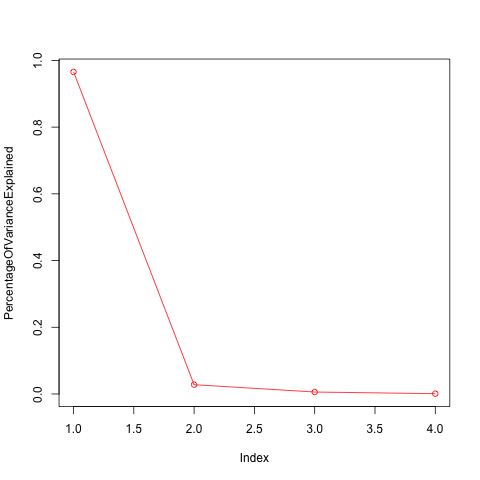

In [41]:
%%R

# PercentageOfVarianceExplainedByPC1 = Eigenvalues[1]/sum(Eigenvalues)
# PercentageOfVarianceExplainedByPC2 = Eigenvalues[2]/sum(Eigenvalues)
# PercentageOfVarianceExplainedByPC3 = Eigenvalues[3]/sum(Eigenvalues)
# PercentageOfVarianceExplainedByPC4 = Eigenvalues[4]/sum(Eigenvalues)

PercentageOfVarianceExplained = Eigenvalues / sum(Eigenvalues)
cat("\n\nPercentage of variance explained:\n")
print(PercentageOfVarianceExplained)
plot(PercentageOfVarianceExplained, type="o", col="red")



Cumulative percentage of variance explained:
[1] 0.9655342 0.9933516 0.9991511 1.0000000


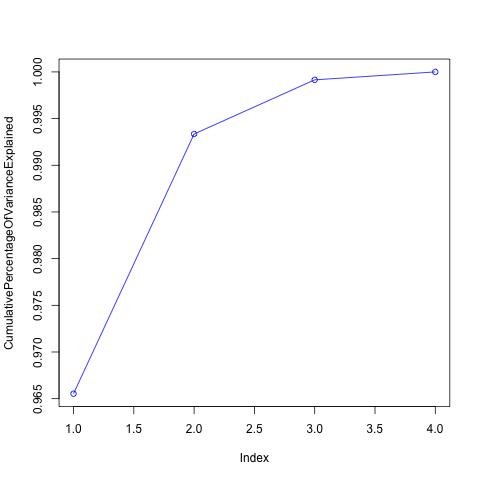

In [42]:
%%R

# PercentageOfVarianceExplainedByPC1andPC2 = sum(Eigenvalues[1:2])/sum(Eigenvalues)

CumulativePercentageOfVarianceExplained = cumsum( PercentageOfVarianceExplained )
cat("\n\nCumulative percentage of variance explained:\n")
print(CumulativePercentageOfVarianceExplained)
plot(CumulativePercentageOfVarianceExplained, type="o", col="blue")

##Dimensionality Reduction

We can reduce the dimensionality of the data by projecting the data onto the first few principal components of the data.

Notice that the first eigenvalue explains 96% of the variance in the data, and the first two cumulatively explain 99% of the variance.

If project the data onto the first two principal components, we get a 2D representation of the data.  This is what is shown in the "biplot" above.

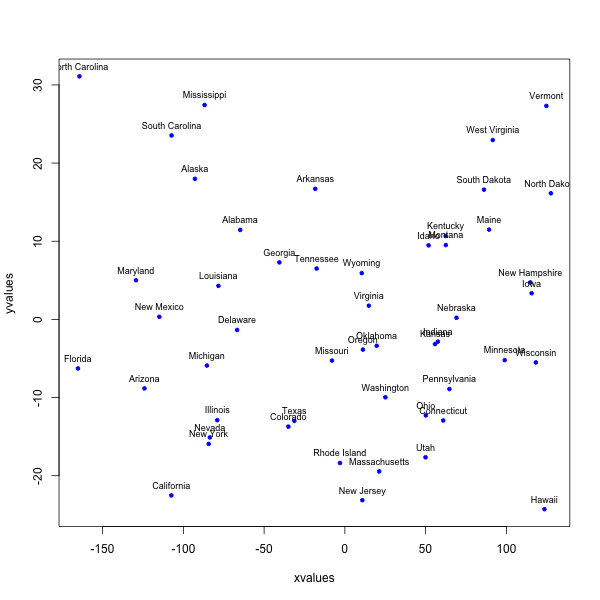

In [43]:
%%R -h 600 -w 600

FirstTwoPrincipalComponents = PrincipalComponents[, 1:2]
# The first two PCs are the first 2 eigenvectors of the covariance matrix

n = nrow(USArrests)
CenteredData = scale(USArrests, center=TRUE, scale=FALSE)

# We can project the data onto these components with matrix multiplication:
ProjectionOfTheData  =  CenteredData %*% FirstTwoPrincipalComponents

xvalues = ProjectionOfTheData[,1]
yvalues = ProjectionOfTheData[,2]

plot(xvalues, yvalues, pch=20, col="blue")

text(xvalues, yvalues, row.names(USArrests), pos=3, col="black", cex=0.75)



##Using the Correlation Matrix instead of the Covariance Matrix

If the data columns are not scaled in similar ways, the covariance matrix will emphasize variables having larger scale.  This can easily lead to misinterpretation of the results.

A relatively safe strategy in PCA is to <b>use the correlation matrix</b>
(instead of the covariance matrix), unless there is a clear reason to use
some other scaling.  The correlation matrix is the covariance matrix of the standardized (normalized, scaled, z-score) version of the data.

<b>As an example, we can re-do the analysis above for USArrests.
The analysis above, from the [ISL] text, may be misleading about the data.</b>


In [44]:
%%R

PCAsvd = svd( cor(USArrests) )   ############# NOTE!  Correlation matrix

PrincipalComponents = PCAsvd$u  #  equivalently:  U

colnames(PrincipalComponents) = c( "PC1", "PC2", "PC3", "PC4" )
rownames(PrincipalComponents) = colnames(USArrests)

Eigenvalues = PCAsvd$d       #  equivalently:  diag(S)


cat("\n\nPrincipal Components (columns of the U eigenvector matrix):\n")
print(PrincipalComponents)

cat("\n\nEigenvalues  (diagonal entries of the S eigenvalue matrix):\n")
print(Eigenvalues)



Principal Components (columns of the U eigenvector matrix):
                PC1        PC2        PC3         PC4
Murder   -0.5358995  0.4181809 -0.3412327  0.64922780
Assault  -0.5831836  0.1879856 -0.2681484 -0.74340748
UrbanPop -0.2781909 -0.8728062 -0.3780158  0.13387773
Rape     -0.5434321 -0.1673186  0.8177779  0.08902432


Eigenvalues  (diagonal entries of the S eigenvalue matrix):
[1] 2.4802416 0.9897652 0.3565632 0.1734301




Percentage of variance explained:
[1] 0.62006039 0.24744129 0.08914080 0.04335752


Cumulative percentage of variance explained:
[1] 0.6200604 0.8675017 0.9566425 1.0000000


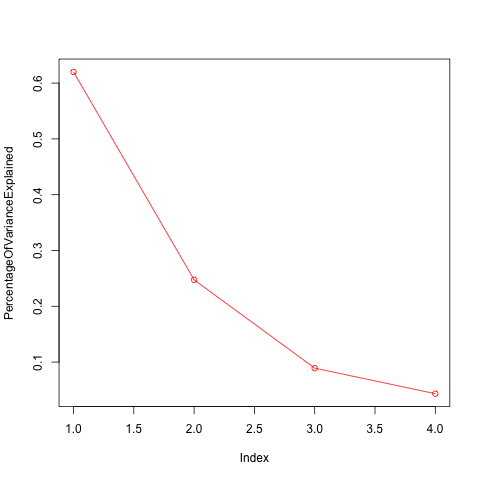

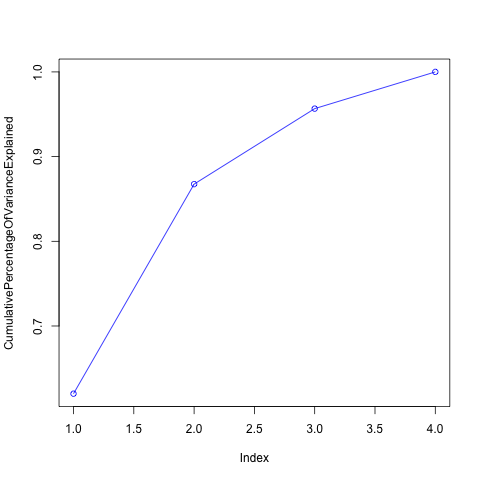

In [45]:
%%R

PercentageOfVarianceExplained = Eigenvalues / sum(Eigenvalues)
cat("\n\nPercentage of variance explained:\n")
print(PercentageOfVarianceExplained)
plot(PercentageOfVarianceExplained, type="o", col="red")

PercentageOfVarianceExplainedByPC1andPC2 = sum(Eigenvalues[1:2])/sum(Eigenvalues)

CumulativePercentageOfVarianceExplained = cumsum( PercentageOfVarianceExplained )
cat("\n\nCumulative percentage of variance explained:\n")
print(CumulativePercentageOfVarianceExplained)
plot(CumulativePercentageOfVarianceExplained, type="o", col="blue")

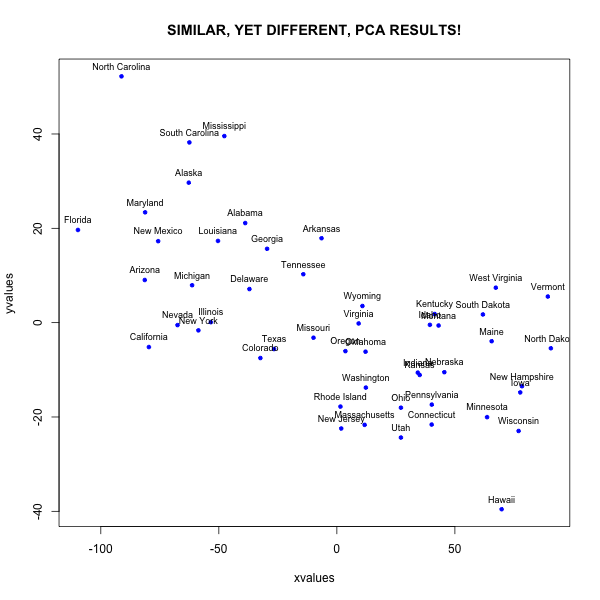

In [46]:
%%R -h 600 -w 600

FirstTwoPrincipalComponents = PrincipalComponents[, 1:2]
# The first two PCs are the first 2 eigenvectors of the covariance matrix

n = nrow(USArrests)
CenteredData = scale(USArrests, center=TRUE, scale=FALSE)

# We can project the data onto these components with matrix multiplication:
ProjectionOfTheData  =  CenteredData %*% FirstTwoPrincipalComponents

xvalues = ProjectionOfTheData[,1]
yvalues = ProjectionOfTheData[,2]

plot(xvalues, yvalues, pch=20, col="blue",
     main = "SIMILAR, YET DIFFERENT, PCA RESULTS!")

text(xvalues, yvalues, row.names(USArrests), pos=3, col="black", cex=0.75)


                PC1        PC2        PC3         PC4
Murder   -0.5358995  0.4181809 -0.3412327  0.64922780
Assault  -0.5831836  0.1879856 -0.2681484 -0.74340748
UrbanPop -0.2781909 -0.8728062 -0.3780158  0.13387773
Rape     -0.5434321 -0.1673186  0.8177779  0.08902432


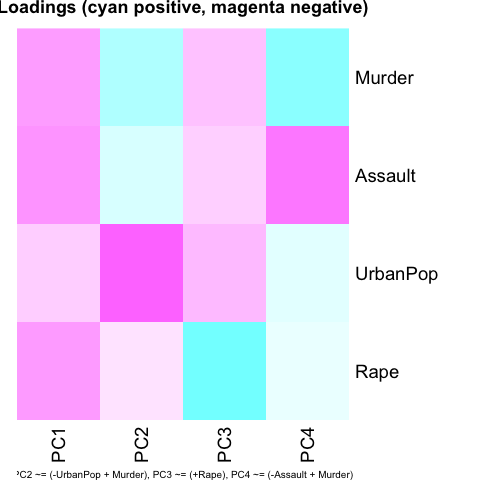

In [47]:
%%R

print( PrincipalComponents )

heatmap( PrincipalComponents,
        main="Loadings (cyan positive, magenta negative)",
        sub="PC2 ~= (-UrbanPop + Murder), PC3 ~= (+Rape), PC4 ~= (-Assault + Murder)",
        col=rev(cm.colors(256)),
        scale="none", rev=TRUE, symm=FALSE,
        Rowv=NA, Colv=NA, mar=c(5,10) )

#OK!  Finally Questions for you to Answer!

#PART A

##How many Principal Components should we keep?

For the USArrests data we kept 2 PCs, but there are different rules for how many PCs to keep.

<u><b>Assume we always use the correlation matrix for PCA</b></u>:

<u><b>Rule#1</b></u>:  <i>keep enough PCs to explain 70% of the variance</i>.<br/>
In other words, keep k PCs, where k is the smallest integer such that:
$$ \sum_{j=1}^k \, \lambda_j ~~~ \geq ~~~ 0.7 ~ \sum_{j=1}^p \, \lambda_j ~~~ = ~~~ 0.7 ~ p. $$
Notice that the trace of the correlation matrix is $p$, so
$\sum_{j=1}^p \lambda_j \,=\,p$.

<u><b>Rule#2</b></u>:  <i>keep all PCs whose correlation matrix eigenvalues are greater than 1</i>.<br/>
In other words, if $\lambda_j$ is the $j$-th eigenvalue from the <b>correlation matrix</b>,
keep $k$ PCs, where $k$ is the smallest integer such that
$$ \lambda_k ~~ \geq ~~ 1. $$

For example, for the USArrests data, Rule#1 says we should keep 2 PCs,
while Rule#2 says we should keep 1 PC:

In [48]:
%%R

lambda = svd( cor(USArrests) )$d
p = ncol(USArrests)

cat("\n\nEigenvalues of the correlation matrix, in descending order\n")
print(lambda)

cat("\n\ncumulative sums of eigenvalues\n")
print( cumsum(lambda)/p )

cat("\n\nEigenvalues >= 1\n")
print( lambda >= 1 )




Eigenvalues of the correlation matrix, in descending order
[1] 2.4802416 0.9897652 0.3565632 0.1734301


cumulative sums of eigenvalues
[1] 0.6200604 0.8675017 0.9566425 1.0000000


Eigenvalues >= 1
[1]  TRUE FALSE FALSE FALSE


#PART B

##For each PC, which variables have the strongest loadings?

Each PC is an eigenvector $\boldsymbol{u}$.  It has $p$ entries, one for each variable.

The loading of variable $j$ ($1 \leq j \leq p$)
on a principal component $\boldsymbol{u}$ is the $j$-th entry $u_{j}$.  These entries can be positive or negative.  Since $\boldsymbol{u}$ is an eigenvector, however, the sum of squares of its entries is 1.

We say the $q$ <i>strongest loadings</i> of $\boldsymbol{u}$ are
the largest $q$ entries $u_j^2$ whose sum exceeds 0.7.

In [49]:
%%R

PrincipalComponents = svd(cor(USArrests))$u  ### correlation matrix

colnames(PrincipalComponents) = c( "PC1", "PC2", "PC3", "PC4" )
rownames(PrincipalComponents) = colnames(USArrests)

cat("\n\nThe pxp matrix of PCs:\n")

print(PrincipalComponents)

cat("\n\nSquare each entry in the matrix of PCs:\n")

print(PrincipalComponents^2)

# notice that the first column has q=3 strong loadings, since we
# need to use the 3 largest squared values to obtain a sum above 0.7.

# Similarly the second column has q=1 strong loadings, because
# one its squared values is already above 0.7.



The pxp matrix of PCs:
                PC1        PC2        PC3         PC4
Murder   -0.5358995  0.4181809 -0.3412327  0.64922780
Assault  -0.5831836  0.1879856 -0.2681484 -0.74340748
UrbanPop -0.2781909 -0.8728062 -0.3780158  0.13387773
Rape     -0.5434321 -0.1673186  0.8177779  0.08902432


Square each entry in the matrix of PCs:
                PC1        PC2        PC3        PC4
Murder   0.28718825 0.17487524 0.11643977 0.42149674
Assault  0.34010315 0.03533859 0.07190358 0.55265468
UrbanPop 0.07739016 0.76179065 0.14289594 0.01792325
Rape     0.29531844 0.02799553 0.66876071 0.00792533


The following kinds of functions are useful for computing the strongest loadings of the principal components:

In [50]:
%%R

cat("\n\nThe pxp matrix of PCs:\n")

print(PrincipalComponents)

cat("\n\nSquare each entry in the matrix of PCs:\n")

print(PrincipalComponents^2)

cat("\n\nApply the 'rank' function to each column:\n")

ComponentEntryRanks = apply( -PrincipalComponents^2, 2, rank )
print(ComponentEntryRanks)

cat("\n\nApply the 'sort' function to each column:\n")

SortedSquaredComponents = apply(PrincipalComponents^2, 2, function(x) sort(x, decreasing=TRUE))
print(SortedSquaredComponents)

cat("\n\nApply the 'cumsum' function to each column:\n")
    
CumulativeSortedSquaredComponents = apply( SortedSquaredComponents, 2, cumsum)
print(CumulativeSortedSquaredComponents)




The pxp matrix of PCs:
                PC1        PC2        PC3         PC4
Murder   -0.5358995  0.4181809 -0.3412327  0.64922780
Assault  -0.5831836  0.1879856 -0.2681484 -0.74340748
UrbanPop -0.2781909 -0.8728062 -0.3780158  0.13387773
Rape     -0.5434321 -0.1673186  0.8177779  0.08902432


Square each entry in the matrix of PCs:
                PC1        PC2        PC3        PC4
Murder   0.28718825 0.17487524 0.11643977 0.42149674
Assault  0.34010315 0.03533859 0.07190358 0.55265468
UrbanPop 0.07739016 0.76179065 0.14289594 0.01792325
Rape     0.29531844 0.02799553 0.66876071 0.00792533


Apply the 'rank' function to each column:
         PC1 PC2 PC3 PC4
Murder     3   2   3   2
Assault    1   3   4   1
UrbanPop   4   1   2   3
Rape       2   4   1   4


Apply the 'sort' function to each column:
            PC1        PC2        PC3        PC4
[1,] 0.34010315 0.76179065 0.66876071 0.55265468
[2,] 0.29531844 0.17487524 0.14289594 0.42149674
[3,] 0.28718825 0.03533859 0.11643977 

#PART C

##Find the observations that have greatest influence on the PCs

Suppose the $n \times p$ dataset we have is $X$, and its <b>correlation matrix</b> $C$ has the SVD
$$C ~~=~~ U ~ S ~ U'$$
so that the $U$ is the $p \times p$ matrix of principal components,
and $S = \mbox{diag}(\lambda_1, ..., \lambda_p)$ is the diagonal matrix of eigenvalues.

Let $\bar{\boldsymbol{x}}$ be the $1 \times p$ row vector of column means of $X$,
so its $j$-th entry is the average of the $j$-th column of $X$.

Let $\bar{X}$ be the $n \times p$ matrix of column means of $X$,
so its $j$-th column consists of $n$ copies of the average of the $j$-th column of $X$.

Finally, define $Z \;=\; (X-\bar{X})\,U$.  This is the <b>projection of the data on the principal components</b>.

People often define 3 measures of influence of the $i$-th observation $\boldsymbol{x}_i$ (row) of $X$:

(1) $a_i ~~=~~ \sum_{j=1}^p z_{ij}^2$, the sum of squares of the $i$-th row of $Z$.
We can show that $a_i = (\boldsymbol{x}_i - \bar{\boldsymbol{x}})' \,  (\boldsymbol{x}_i - \bar{\boldsymbol{x}})$.

(2) $b_i ~~=~~ \sum_{j=1}^p z_{ij}^2/\lambda_{j}$.
We can show that $b_i = (\boldsymbol{x}_i - \bar{\boldsymbol{x}})' \, C^{-1} \, (\boldsymbol{x}_i - \bar{\boldsymbol{x}})$.

(3) $c_i ~~=~~ \sum_{j=1}^p \lambda_{j} ~ z_{ij}^2$.
We can show that $c_i = (\boldsymbol{x}_i - \bar{\boldsymbol{x}})' \, C \, (\boldsymbol{x}_i - \bar{\boldsymbol{x}})$.

The $a$-values emphasize the size of each row;
the $b$-values emphasize influence on small principal components;
the $c$-values emphasize influence on large principal components.

Your job is to find the index $i$ of the observations $\boldsymbol{x}_i$ that maximizes $a_i$, $b_i$, and $c_i$.

For example, with the USArrests data, the value of $i$ that maximizes $a_i$ is 33:

In [51]:
%%R

U = PrincipalComponents
Z = scale(USArrests, center=TRUE, scale=FALSE) %*% U

cat("\n\na-influence values (apply sum to each row of squared Z matrix):\n")
a = apply(Z^2, 1, sum )
print(a)

cat("\n\nfind the value of i that maximizes a[i]:\n")
i = which( a == max(a) )

cat( i, "\n")

cat("\n\nthe value of a[i]:\n")
print(a[i])



a-influence values (apply sum to each row of squared Z matrix):
       Alabama         Alaska        Arizona       Arkansas     California 
     4342.4000      9362.1620     15492.7004       615.6932     12100.2576 
      Colorado    Connecticut       Delaware        Florida        Georgia 
     1565.2928      3945.9088      4596.0204     27355.6180      1763.2064 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
    15877.1644      2786.1136      6440.8336      3336.9088     13372.6596 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
     3123.0320      4025.6096      6180.5888      8126.0012     16760.5820 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
      887.9924      7378.8640      9819.7312      8336.4320       122.3312 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
     3998.0944      4775.0272      7471.8688     13202.3424       694.7344 
    New Mexico       N

#That's it!  Now write an R script that does this for any table it reads in

Your R script can be an extension of this outline:

<pre>
Table = data.matrix(read.csv( file = "stdin", header=TRUE ))

cat( ... number of principal components to keep by Rule 1 ..., "\n" )

cat( ... number of principal components to keep by Rule 2 ..., "\n" )

cat( ... vector of numbers of strongest loadings for each PC, as defined above ..., "\n" )

cat( ... the value of i that maximizes  a[i] ..., "\n" )

cat( ... the value of i that maximizes  b[i] ..., "\n" )

cat( ... the value of i that maximizes  c[i] ..., "\n" )
</pre>

#What your program's output should look like

If the USArrests table above was given as input,
your program should print the following values:
<pre>
2
1
3  1  2  2
33
33
9
</pre>


As another test, with the mtcars dataset, the output should look like this:
<pre>
2 
2 
6 4 4 1 3 4 2 2 3 1 2 
15 
15 
15 
</pre>

As usual, output values are always integers.